In [33]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from numpy.typing import NDArray


def lbp(image: NDArray) -> NDArray:
    kernel = [
        [1, 2, 4],
        [8, 16, 32],
        [64, 128, 256]
    ]
    image = image.astype('uint16')
    convolved = cv2.filter2D(image, -1, np.array(kernel))
    return np.histogram(convolved, bins=list(range(512)))[0].astype('float32') / np.prod(convolved.shape)

In [81]:
data = np.load('../data/mnist.npz')['training_images'].reshape(-1, 28, 28, 1).astype('uint8')

In [82]:
from tqdm.auto import tqdm

data_lbp = np.stack([lbp(x) for x in tqdm(data)], axis=0)

  0%|          | 0/50000 [00:00<?, ?it/s]

In [83]:
from pathlib import Path

def read_image(p: Path) -> NDArray:
    return cv2.imread(str(p))[..., :1].astype('float32') / 255

In [ ]:
directory = Path('../data/suspicious/binary-mnist') / 'ClassificationNet-directional-grad-fixed-2048-10001-random-3-non-smooth-alpha-1.0-p-1.0-t-0.0-g-0.0-eval'

k = np.array([
    [0, 1, 0],
    [1, 1, 1],
    [0, 1, 0]
], dtype=np.uint8)

images = [(read_image(p) >= 0.5).astype('uint8') for p in directory.glob('*.png')]
# images = [cv2.morphologyEx(image, cv2.MORPH_OPEN, k) for image in images]
len(images)

41

In [89]:
image_lbp = np.stack([lbp(i) for i in images], axis=0)

In [ ]:
from scipy.spatial import distance_matrix

closest = distance_matrix(data_lbp, image_lbp).argmin(axis=0)
closest.shape

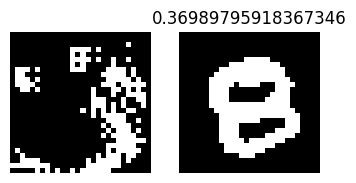

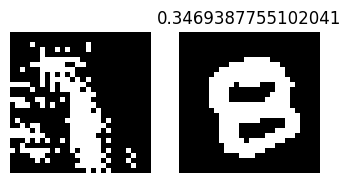

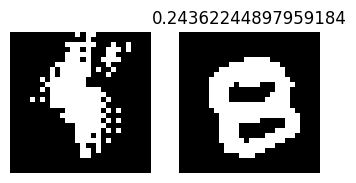

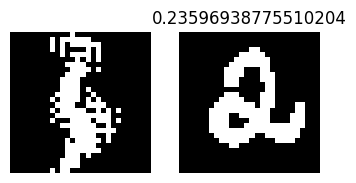

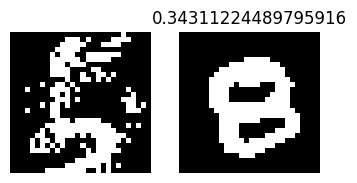

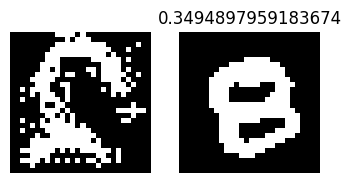

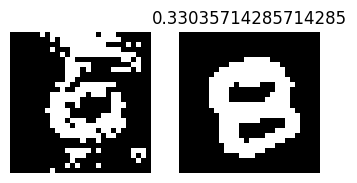

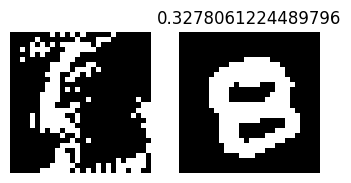

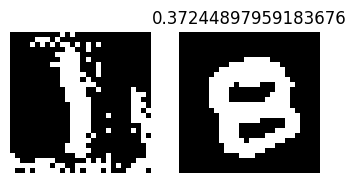

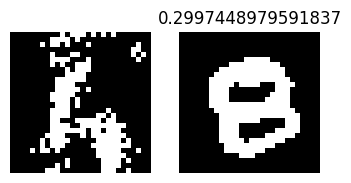

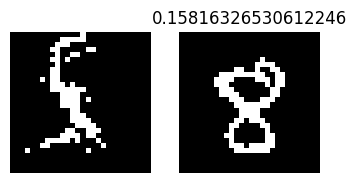

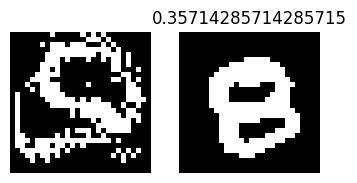

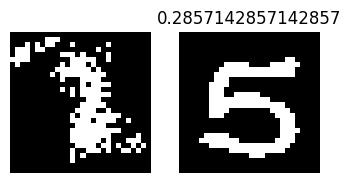

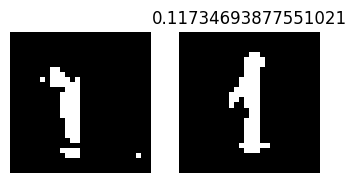

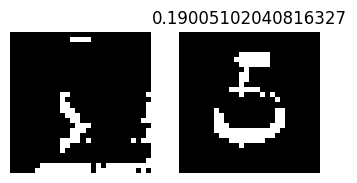

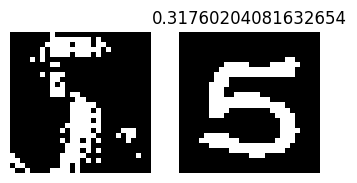

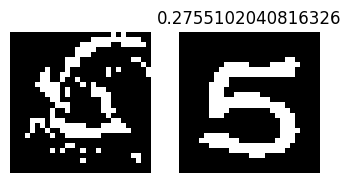

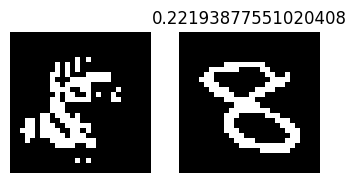

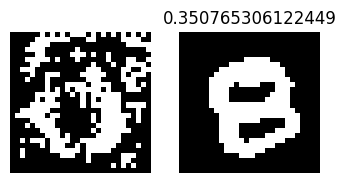

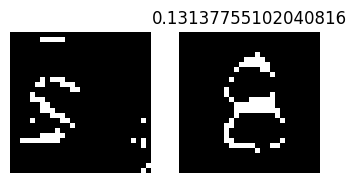

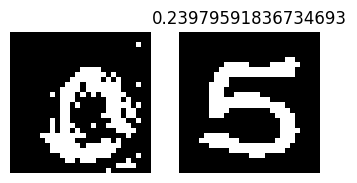

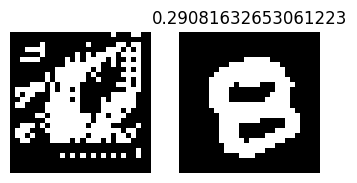

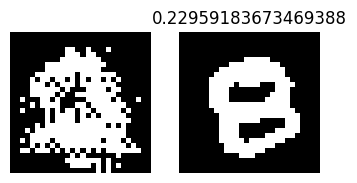

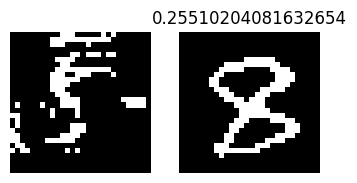

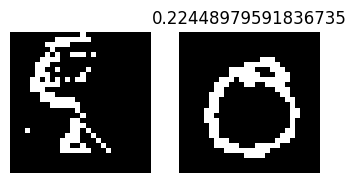

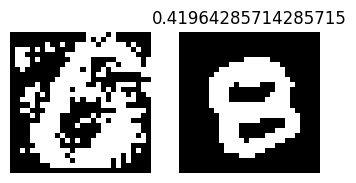

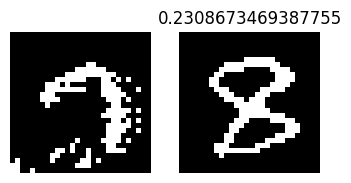

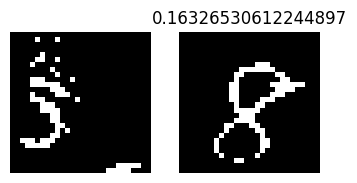

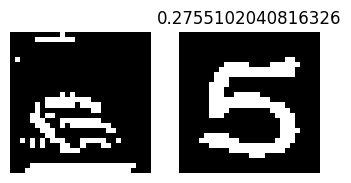

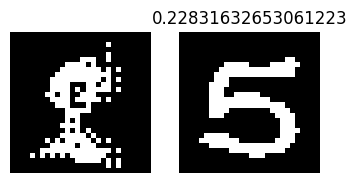

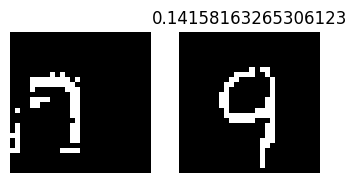

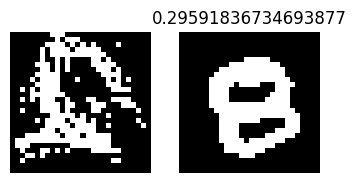

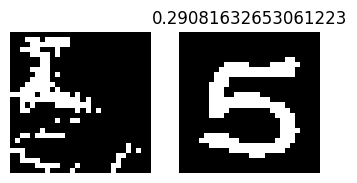

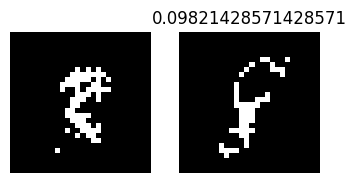

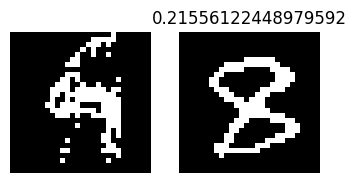

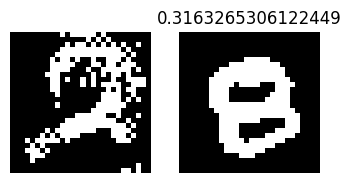

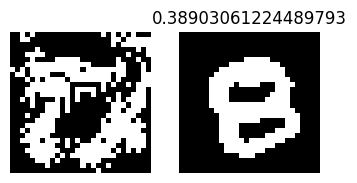

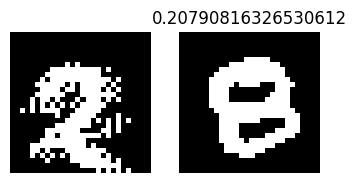

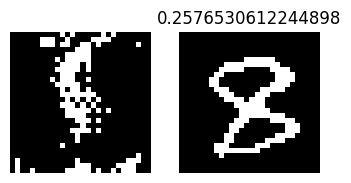

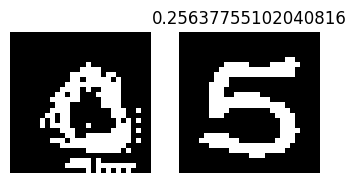

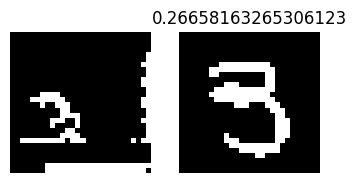

In [ ]:
for i, (image, idx) in enumerate(zip(images, closest)):
    fig, ax = plt.subplots(ncols=2, figsize=(4, 2))
    plt.title(str(((image - data[idx]) ** 2).mean()))
    ax[0].imshow(image, cmap='gray')
    ax[1].imshow(data[idx], cmap='gray')
    ax[0].axis('off')
    ax[1].axis('off')
    plt.savefig(f'../results/match/{i}.png')
    plt.show()

